## Libraries

In [41]:
import pandas as pd
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import os

## Functions

##### Okuduğumuz ses dosylarını spectrogram a dönüştüren fonksiyon

In [42]:
def create_spectrogram(y):
    spec = librosa.feature.melspectrogram(y=y)
    spec_conv = librosa.amplitude_to_db(spec, ref = np.max)
    return spec_conv

##### Spectrogram' larımızı ilgili dizinlere kaydediyoruz.

##### plt.savefig() fonksiyornu ile elimizdeki resmi veya spectrogramı bilgisayarımıza kaydetmemize yarıyor.

In [43]:
def save_spectrogram(spectrogram, filename, classid):
    if str(classid) not in os.listdir():
        os.mkdir(f"spectrograms/{classid}")
    
    save_file_name = filename.split(".")[0]
    plt.figure()
    librosa.display.specshow(spectrogram)
    plt.savefig(f"spectrograms/{classid}/{save_file_name}.png", bbox_inches="tight", pad_inches=0)
    plt.close()

Not: spektrogram' ın etrafındaki beyaz border ı kaldırmak için bbox_inches="tight", pad_inches=0ekliyoruz.

#### Dosya adını ve uzantısını ayırıyoruz

In [40]:
filename1 = "1000263_3_0_0.wav"
splited = filename1.split(".")
print(splited[0])
print(splited[1])
print(f"{splited[0]}.png")

1000263_3_0_0
wav
1000263_3_0_0.png


##### os.listdir() fonksiyonu içinde bulunduğunuz dizindeki klasör ve dosyaları gösterir.

In [34]:
#print(os.listdir())

['DNM', 'Spectrograms.ipynb', 'Spectrograms.py', 'UrbanSound8K.csv', '__pycache__']


In [35]:
if "spectrograms" not in os.listdir():
    print("Bulunamadı")

Bulunamadı


## Imports

In [5]:
df = pd.read_csv("UrbanSound8K.csv")

In [6]:
df.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


## Processing

In [7]:
path_to_folds = "D://Artificial_Intelligence/Bootcamps/Deep_Learning_Bootcamp/Project/Data_Project/City_Sounds/UrbanSound8K/audio"
#"Data_Project/City_Sounds/UrbanSound8K/audio"

In [44]:
if "spectrograms" not in os.listdir():
    os.mkdir("spectrograms")

number_of_files = df.shape[0]
number_of_process = 0
number_of_errors = 0

for index, row in df.iterrows():
    try:
        #print(index)
        #print(row)
        #print("--------------")
        filename = row["slice_file_name"]
        classid = row["classID"]
        fold = row["fold"]
        #print(f"File Name : {filename} |  ID : {classid} | Fold : {fold}")
        path_to_file = f"{path_to_folds}/fold{fold}/{filename}"
        #print(path_to_file)
        data, sr = librosa.load(path_to_file)
        spectrogram = create_spectrogram(data)
        save_spectrogram(spectrogram, filename, classid)
        break

        # python Garbage Collector for döngüsünde çalışırken bazen aksamalar olabiliyor.
        # Bunu engellemek için her adımda data, sr ve spectrogram değişkenlerini sildirebiliriz.
        del data
        del sr
        del spectrogram
    except:
        number_of_errors += 1
    finally:
        number_of_process += 1
        # finally bloğu her ne olursa olsun çalışır. Yani hata alınsa da alınmasada.

    print(f"\rNumber = {number_of_process} / {number_of_files} | Errors : {number_of_errors}", end="")
    # Not1 : end="" mesajın alt satıra geçmesini engelliyor.
    # Not2 : "\r" ise mesajların ya yana yazmasını engelliyor. Böylece hep aynı yere mesajlar güncellenerek yazıyor.

##### Not: plt.figure() ve plt.show() ekleyerek bu spectrogram a matplotlib objesi gibi davrandırabilirim. figsize ile boyutunu ayarlayabiliriz.

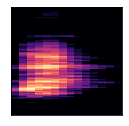

In [30]:
plt.figure(figsize=(2,2))
librosa.display.specshow(spectrogram)
plt.show()

#### Örnekleme bakalım

In [10]:
data

array([-0.00341243, -0.00506065, -0.00463294, ..., -0.00247565,
       -0.00155365, -0.00035246], dtype=float32)

#### Sample Rate (sr) : 1sn. lik ses dosyası için 22050 örnek çıkar demektir.

In [12]:
sr

22050

#### Not: Örneklem tipimiz numpy dizisi

In [11]:
type(data)

numpy.ndarray

In [13]:
data.shape

(7002,)

#### Ek Bilgi : data.shape / sr = ses uzunluğunu verir.

In [19]:
data.shape[0] / sr

0.31755102040816324

#### Oluşturduğumuz Spektrogram ı görelim.

In [24]:
spectrogram

array([[-80., -80., -80., ..., -80., -80., -80.],
       [-80., -80., -80., ..., -80., -80., -80.],
       [-80., -80., -80., ..., -80., -80., -80.],
       ...,
       [-80., -80., -80., ..., -80., -80., -80.],
       [-80., -80., -80., ..., -80., -80., -80.],
       [-80., -80., -80., ..., -80., -80., -80.]], dtype=float32)